In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.colors import LightSource
from matplotlib.animation import FuncAnimation
from itertools import product 

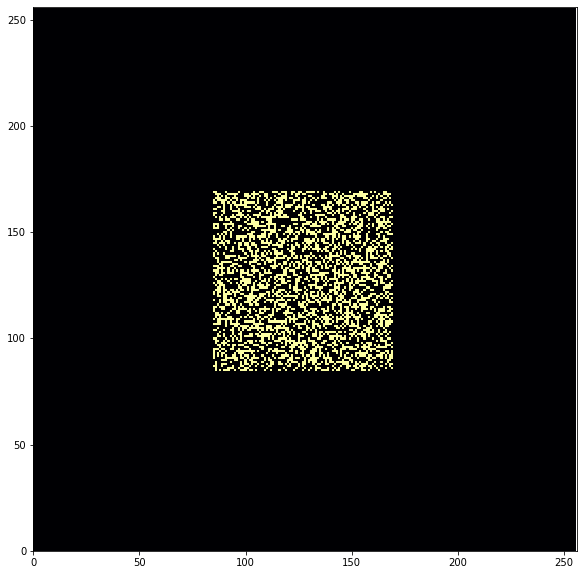

In [2]:
SIZE = (256, 256)

movements = list(product([1,0,-1], [-1,0,1]))
movements.remove((0,0))
field = np.zeros((SIZE[0],SIZE[1]))

cells = np.random.randint(SIZE[0]/3,2*SIZE[0]/3 , size=(4000,2))
for coords in cells:
    field[coords[0]][coords[1]] = 1

fig = plt.figure() 
fig.set_size_inches(10, 10)
ax = plt.axes(xlim=(0, SIZE[0]), ylim=(0, SIZE[1])) 
implot = ax.imshow(field, cmap='inferno' )

In [3]:
def init(): 
    # creating an empty plot/frame 
    implot.set_data(field)
    return implot, 


In [4]:
def animate(i):
    global field
    livecells = np.zeros((SIZE[0],SIZE[1]))
    for s in movements:
        livecells = livecells + np.roll(field,shift=s,axis=(0,1))
    field = np.where(livecells > 3,0,field)
    field = np.where(livecells == 3,1,field)
    field = np.where(livecells < 2,0,field)

    implot.set_data(field)
    return implot,

In [5]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=1000, interval=20, blit=True)

In [6]:
HTML(anim.to_html5_video())